In [14]:
import pandas as pd

# Load the dataset
file_path = 'cleaned.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7237 entries, 0 to 7236
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                 

(None,
    0 Healthy Yogurt Parfait with Oats and Fresh Fruits Recipe    
 0  1        Udupi Style Ash Gourd Coconut Curry Recipe          \
 1  2  Moongphali Bhindi Sabzi Recipe - Lady's Finger...          
 2  3  Konkani Style Batata Song Recipe - Dry Red Chi...          
 3  4          One Pot Vegetable Pasta With Beans Recipe          
 4  5               Moolangi Tovve Recipe - Radish Curry          
 
   Healthy Yogurt Parfait with Oats and Fresh Fruits Recipe is a must try breakfast dish which is packed with nutrient in one jar. It is layered with creamy coconut oats, chopped apples, fresh and sweet yogurt parfait, chopped banana and topped up with pistachios and prunes. You can add your own twist and change the fruits of your own choice.   
 0  Udupi Style Ash Gourd Coconut Curry Recipe is ...                                                                                                                                                                                            

In [15]:
# Load the dataset with different parameters
data = pd.read_csv(file_path, header=None)

# Display basic information and the first few rows of the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7238 entries, 0 to 7237
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7238 non-null   int64  
 1   1       7238 non-null   object 
 2   2       7238 non-null   object 
 3   3       7238 non-null   object 
 4   4       7238 non-null   object 
 5   5       7238 non-null   object 
 6   6       7229 non-null   object 
 7   7       7238 non-null   object 
 8   8       7238 non-null   float64
 9   9       7238 non-null   float64
 10  10      7238 non-null   object 
 11  11      7238 non-null   object 
 12  12      7238 non-null   object 
 13  13      7238 non-null   int64  
 14  14      7238 non-null   float64
 15  15      7238 non-null   int64  
 16  16      7238 non-null   int64  
 17  17      7238 non-null   int64  
dtypes: float64(3), int64(5), object(10)
memory usage: 1018.0+ KB


(None,
    0                                                  1    
 0   0  Healthy Yogurt Parfait with Oats and Fresh Fru...  \
 1   1        Udupi Style Ash Gourd Coconut Curry Recipe    
 2   2  Moongphali Bhindi Sabzi Recipe - Lady's Finger...   
 3   3  Konkani Style Batata Song Recipe - Dry Red Chi...   
 4   4          One Pot Vegetable Pasta With Beans Recipe   
 
                                                   2                     3    
 0  Healthy Yogurt Parfait with Oats and Fresh Fru...           Continental  \
 1  Udupi Style Ash Gourd Coconut Curry Recipe is ...                 Udupi   
 2  Moongphali Bhindi Sabzi Recipe is a quick and ...  North Indian Recipes   
 3  Konkani Style Batata Song Recipe-Dry Red Chili...                Konkan   
 4  One Pot Vegetable Pasta with Beans is filled w...       Italian Recipes   
 
                 4                        5    
 0  World Breakfast               Vegetarian  \
 1            Lunch               Vegetarian   
 2   

In [16]:
# Rename the columns
data.columns = [
    'Index', 'Name', 'Description', 'Cuisine', 'Course', 'Diet', 
    'Ingredients Name', 'Ingredients Quantity', 'Prep Time (in mins)', 
    'Cook Time (in mins)', 'Instructions', 'Image URL', 
    'Extra Column 1', 'Extra Column 2', 'Extra Column 3', 
    'Extra Column 4', 'Extra Column 5', 'Extra Column 6'
]

# Display basic information and the first few rows of the dataset
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7238 entries, 0 to 7237
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 7238 non-null   int64  
 1   Name                  7238 non-null   object 
 2   Description           7238 non-null   object 
 3   Cuisine               7238 non-null   object 
 4   Course                7238 non-null   object 
 5   Diet                  7238 non-null   object 
 6   Ingredients Name      7229 non-null   object 
 7   Ingredients Quantity  7238 non-null   object 
 8   Prep Time (in mins)   7238 non-null   float64
 9   Cook Time (in mins)   7238 non-null   float64
 10  Instructions          7238 non-null   object 
 11  Image URL             7238 non-null   object 
 12  Extra Column 1        7238 non-null   object 
 13  Extra Column 2        7238 non-null   int64  
 14  Extra Column 3        7238 non-null   float64
 15  Extra Column 4       

(None,
    Index                                               Name   
 0      0  Healthy Yogurt Parfait with Oats and Fresh Fru...  \
 1      1        Udupi Style Ash Gourd Coconut Curry Recipe    
 2      2  Moongphali Bhindi Sabzi Recipe - Lady's Finger...   
 3      3  Konkani Style Batata Song Recipe - Dry Red Chi...   
 4      4          One Pot Vegetable Pasta With Beans Recipe   
 
                                          Description               Cuisine   
 0  Healthy Yogurt Parfait with Oats and Fresh Fru...           Continental  \
 1  Udupi Style Ash Gourd Coconut Curry Recipe is ...                 Udupi   
 2  Moongphali Bhindi Sabzi Recipe is a quick and ...  North Indian Recipes   
 3  Konkani Style Batata Song Recipe-Dry Red Chili...                Konkan   
 4  One Pot Vegetable Pasta with Beans is filled w...       Italian Recipes   
 
             Course                     Diet   
 0  World Breakfast               Vegetarian  \
 1            Lunch               V

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

# Text Preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-z\s]', '', text)
    return text

# Preprocess the 'Description', 'Ingredients Name', and 'Instructions' columns
data['Description'] = data['Description'].apply(preprocess_text)
data['Ingredients Name'] = data['Ingredients Name'].astype(str).apply(preprocess_text)
data['Instructions'] = data['Instructions'].apply(preprocess_text)

# Display the first few rows of the preprocessed data
data[['Description', 'Ingredients Name', 'Instructions']].head()


,Description,Ingredients Name,Instructions
0,healthy yogurt parfait with oats and fresh fru...,instant oats oatmeal coconut milk honey salt c...,we begin making the healthy yogurt parfait wit...
1,udupi style ash gourd coconut curry recipe is ...,vellai poosanikai ash gourdwhite pumpkin turme...,to begin making the udupi style ash gourd coco...
2,moongphali bhindi sabzi recipe is a quick and ...,bhindi lady fingerokra oil ajwain carom seeds ...,to make moongphali bhindi sabzi recipe first w...
3,konkani style batata song recipedry red chili ...,potatoes aloo mustard seeds rai kadugu salt dr...,to begin making the konkani style batata song ...
4,one pot vegetable pasta with beans is filled w...,pasta fusilli green bell pepper capsicum gree...,to begin making the one pot vegetable pasta wi...


In [18]:
# Combine 'Description', 'Ingredients Name', and 'Instructions' into a single text column
data['Combined Text'] = data['Description'] + ' ' + data['Ingredients Name'] + ' ' + data['Instructions']

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit and transform the combined text data into a TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Combined Text'])

# Display the shape of the TF-IDF matrix
tfidf_matrix.shape


(7238, 5000)

In [19]:
# Calculate cosine similarity matrix
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Display the shape and first few rows of the cosine similarity matrix
cosine_sim_matrix.shape, cosine_sim_matrix[:5, :5]


((7238, 7238),
 array([[1.        , 0.03941797, 0.01467175, 0.02688491, 0.02948493],
        [0.03941797, 1.        , 0.05387379, 0.14095787, 0.02941726],
        [0.01467175, 0.05387379, 1.        , 0.05270752, 0.02077954],
        [0.02688491, 0.14095787, 0.05270752, 1.        , 0.02898709],
        [0.02948493, 0.02941726, 0.02077954, 0.02898709, 1.        ]]))

In [20]:
# Function to get recipe recommendations based on cosine similarity
def get_recommendations(recipe_index, top_n=5):
    # Get the cosine similarity scores for the given recipe
    sim_scores = list(enumerate(cosine_sim_matrix[recipe_index]))
    
    # Sort the recipes based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top N similar recipes
    sim_indices = [i[0] for i in sim_scores[1:top_n+1]]
    
    # Get the recipe names for the top N similar recipes
    recommended_recipes = data['Name'].iloc[sim_indices]
    
    return recommended_recipes

# Test the recommendation function for the first recipe in the dataset
get_recommendations(0, top_n=5)


7118               Oats Yogurt Parfait With Fruits Recipe
1989             Oats, Mango and Yogurt Breakfast Parfait
6886    Oats & Yogurt Parfait with Chocolate Almond To...
883      High Fiber Oat And Orange Coconut Parfait Recipe
3253                   Broccoli Oats Smoothie Bowl Recipe
Name: Name, dtype: object

In [21]:
# Get recommendations for a few random recipes in the dataset
import random

random_indices = random.sample(range(len(data)), 5)
recommendations = {}

for index in random_indices:
    recommended_recipes = get_recommendations(index, top_n=5)
    recommendations[data['Name'].iloc[index]] = list(recommended_recipes)

recommendations


{'Chicken Korma Recipe - Mughlai Style Chicken Curry': ['Mughlai Style Chicken Changezi Recipe',
  'Andhra Style Chicken Fry Recipe',
  'Delicious Methi Chicken Curry - Murgh Methi Curry Recipe',
  'Kerala Chicken Roast Recipe',
  'Chicken In White Gravy Recipe'],
 'Instant Gor Kairi Lonche Recipe - Sweet Raw Mango Pickle': ['Gujarati Gor Keri Recipe - Sweet And Spicy Raw Mango Pickle',
  'Maharashtrian Kolambi Che Lonche Recipe (Prawns In Pickle Masala)',
  'Instant Carrot Pickle Recipe',
  'Office Mango Recipe -Instant Raw Mango Pickle',
  'Instant Red Chilli Pickle Recipe'],
 'Bharva Baingan Masala Recipe - Stuffed Brinjal Masala': ['Bharva Baingan Recipe (Stuffed Roasted Eggplant)',
  'Eggplant In Coconut Milk Gravy Recipe -Baingan Masala Sabzi',
  'Baingan Tamatar Sabzi - Brinjal/ Eggplant Masala Recipe',
  'Safed Achari Baingan Recipe - White Aubergine in pickled spices',
  'Bharva Bhindi Recipe - Pan Fried Stuffed Okra With Spices & Peanuts'],
 'Fig Honey & Paprika Preserve Reci

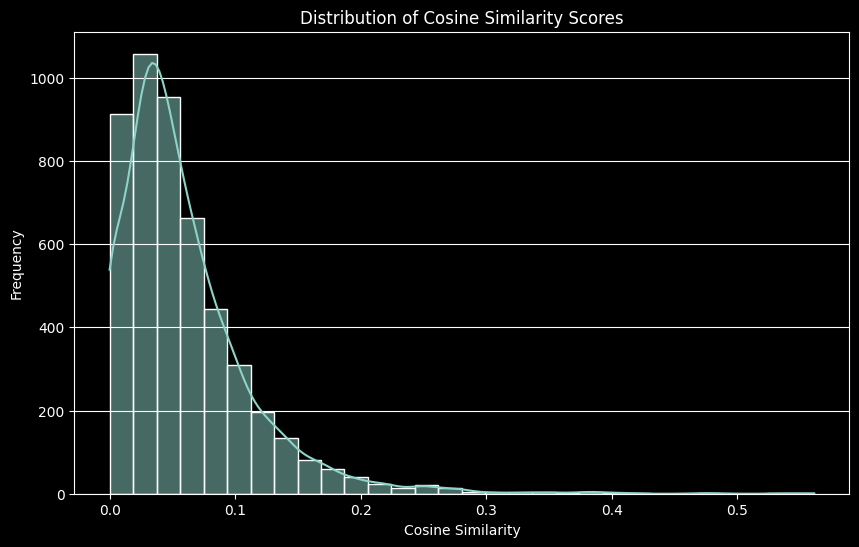

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample 100 recipes and calculate cosine similarity scores for each pair
sample_indices = random.sample(range(len(data)), 100)
sample_cosine_sim_matrix = cosine_similarity(tfidf_matrix[sample_indices, :])


# Extract the upper triangle of the cosine similarity matrix (excluding the diagonal)
upper_triangle_indices = np.triu_indices(len(sample_cosine_sim_matrix), k=1)
cosine_sim_scores = sample_cosine_sim_matrix[upper_triangle_indices]

# Plot the distribution of cosine similarity scores
plt.figure(figsize=(10, 6))
sns.histplot(cosine_sim_scores, bins=30, kde=True)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


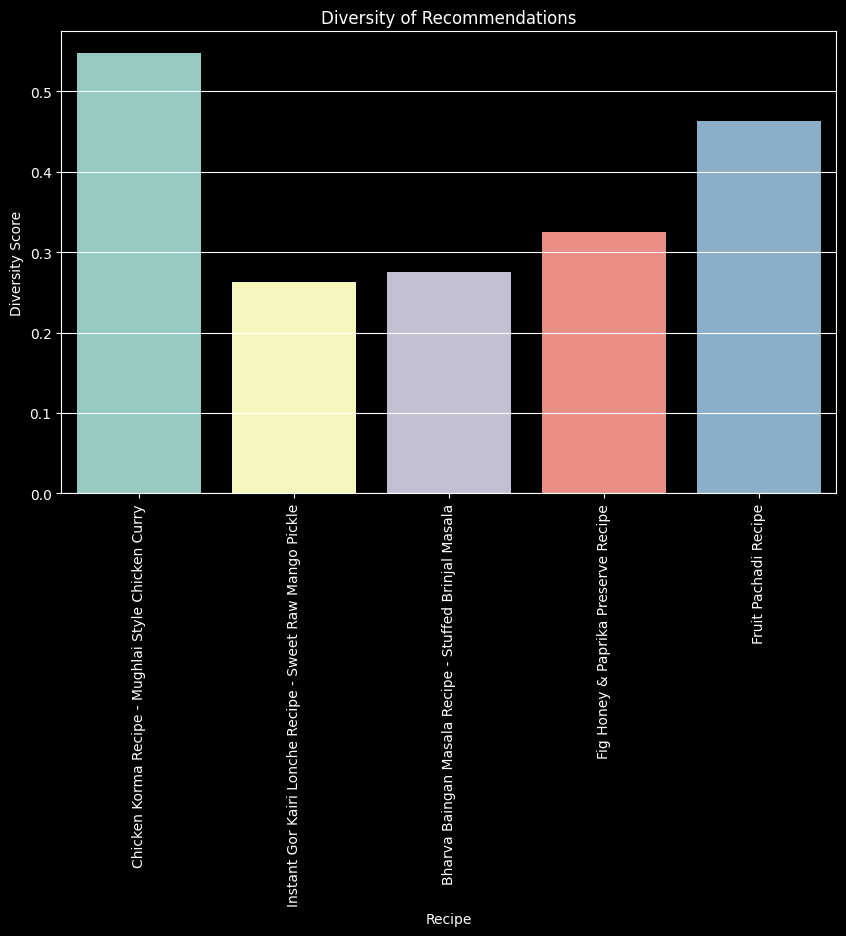

In [23]:
# Function to calculate diversity of recommendations
def calculate_diversity(recommended_indices):
    recommended_matrix = tfidf_matrix[recommended_indices, :]
    cosine_sim_scores = cosine_similarity(recommended_matrix)
    upper_triangle_indices = np.triu_indices(len(cosine_sim_scores), k=1)
    diversity_score = np.mean(cosine_sim_scores[upper_triangle_indices])
    return diversity_score

# Calculate the diversity of recommendations for a few random recipes
diversity_scores = []

for index in random_indices:
    recommended_indices = get_recommendations(index, top_n=5).index.tolist()
    diversity_score = calculate_diversity(recommended_indices)
    diversity_scores.append(diversity_score)

# Plot the diversity scores
plt.figure(figsize=(10, 6))
sns.barplot(x=[data['Name'].iloc[i] for i in random_indices], y=diversity_scores)
plt.title('Diversity of Recommendations')
plt.xlabel('Recipe')
plt.ylabel('Diversity Score')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()
